In [1]:
#analysis->feature engineering->modeling->web app

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sns.set_style('whitegrid')

In [5]:
path = "E:/dataprojects/jupyter/credit_risk/german_credit_data.csv"
df = pd.read_csv(path)
print(df.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.dropna().reset_index(drop=True)   

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        522 non-null    int64 
 1   Age               522 non-null    int64 
 2   Sex               522 non-null    object
 3   Job               522 non-null    int64 
 4   Housing           522 non-null    object
 5   Saving accounts   522 non-null    object
 6   Checking account  522 non-null    object
 7   Credit amount     522 non-null    int64 
 8   Duration          522 non-null    int64 
 9   Purpose           522 non-null    object
 10  Risk              522 non-null    object
dtypes: int64(5), object(6)
memory usage: 45.0+ KB
None


In [12]:
df.drop(columns = 'Unnamed: 0', inplace=True)

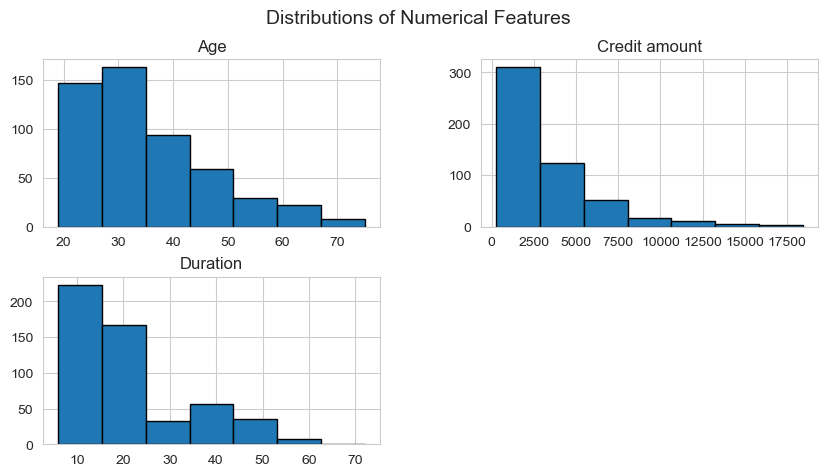

In [13]:
df[['Age', 'Credit amount', 'Duration']].hist(bins=7, edgecolor='black', figsize=(10, 5))
plt.suptitle('Distributions of Numerical Features', fontsize=14)
plt.show()

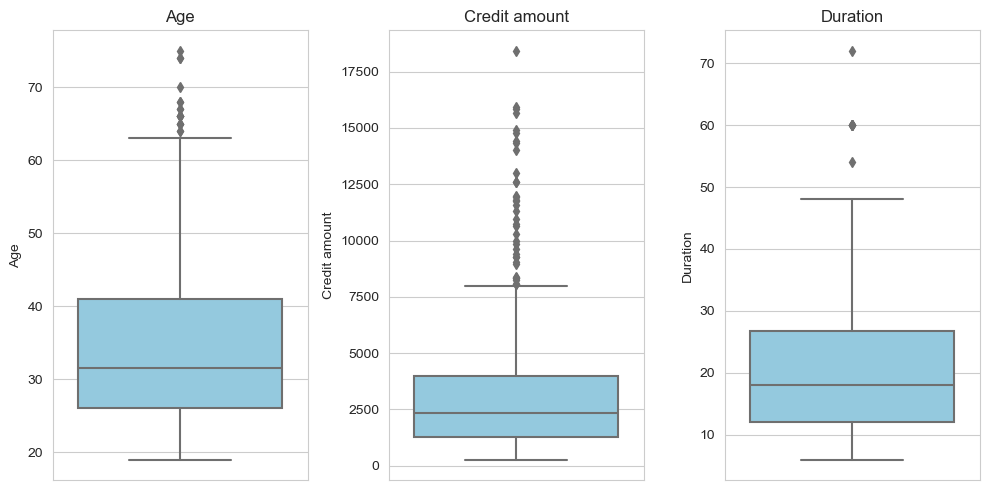

In [14]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
df.query('Duration >= 60')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [16]:
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

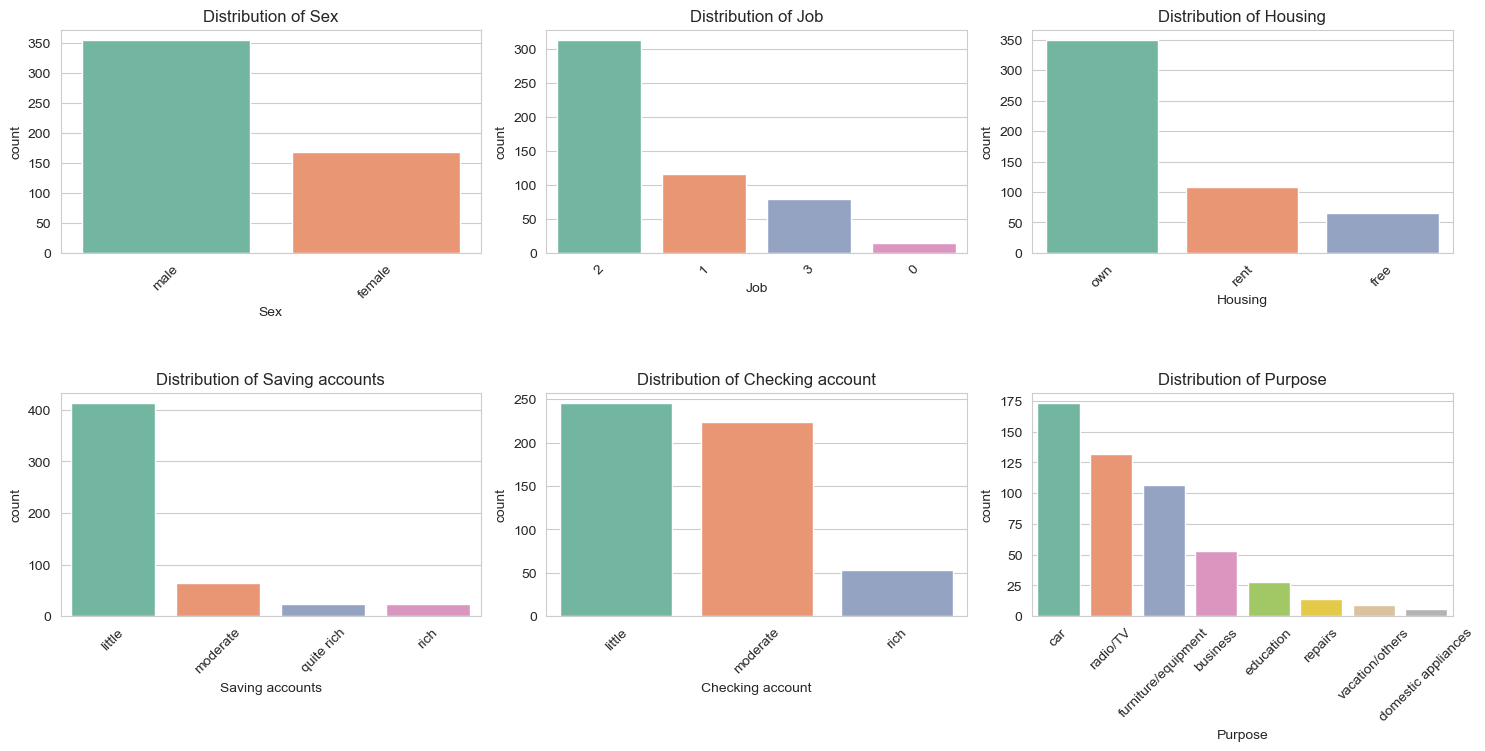

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [18]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].corr()

In [19]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


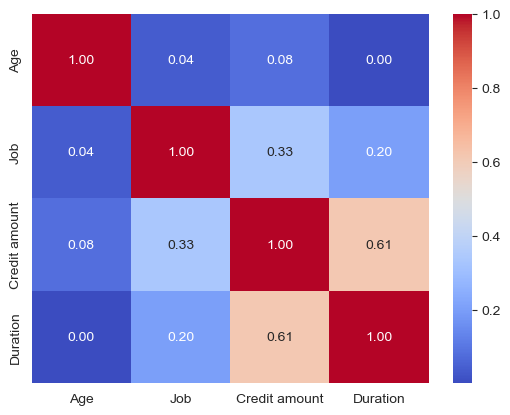

In [20]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()  

In [21]:
df.groupby('Job')['Credit amount'].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [22]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [23]:
pd.pivot_table(df, values='Credit amount', index='Housing', columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


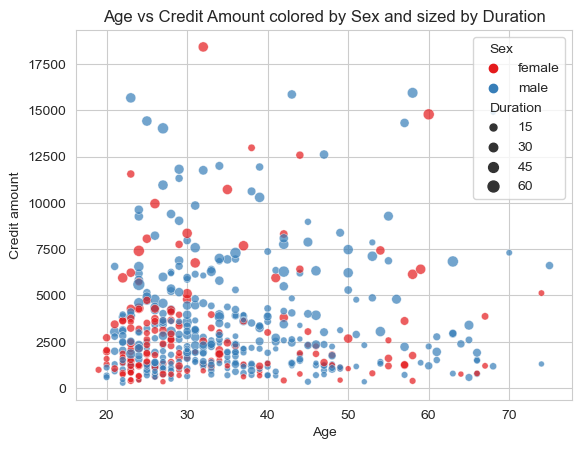

In [24]:
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Sex', size='Duration', alpha=0.7, palette='Set1')
plt.title('Age vs Credit Amount colored by Sex and sized by Duration')
plt.show()

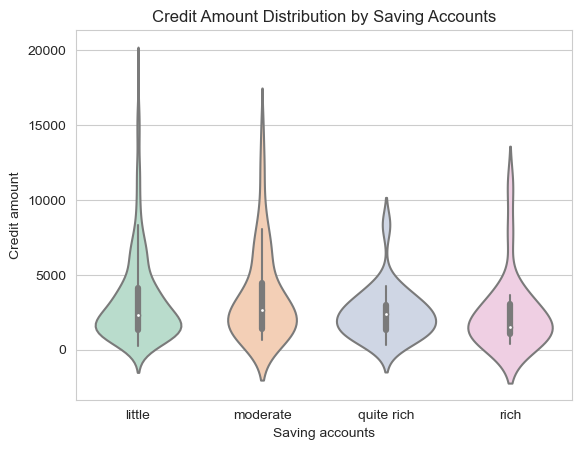

In [25]:
sns.violinplot(data=df, x='Saving accounts', y='Credit amount', palette='Pastel2')
plt.title('Credit Amount Distribution by Saving Accounts') 
plt.show()

In [26]:
df['Risk'].value_counts(normalize=True) * 100

good    55.747126
bad     44.252874
Name: Risk, dtype: float64

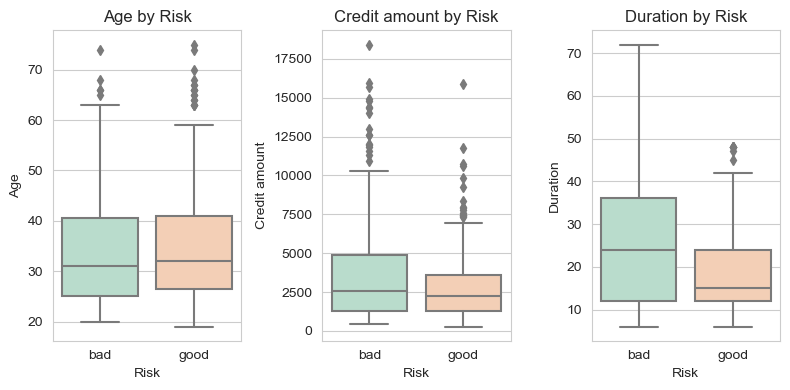

In [27]:
plt.figure(figsize=(8, 4))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Risk', y=df[col], palette='Pastel2')
    plt.title(f'{col} by Risk')
plt.tight_layout()
plt.show()

In [28]:
df.groupby('Risk')[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [29]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

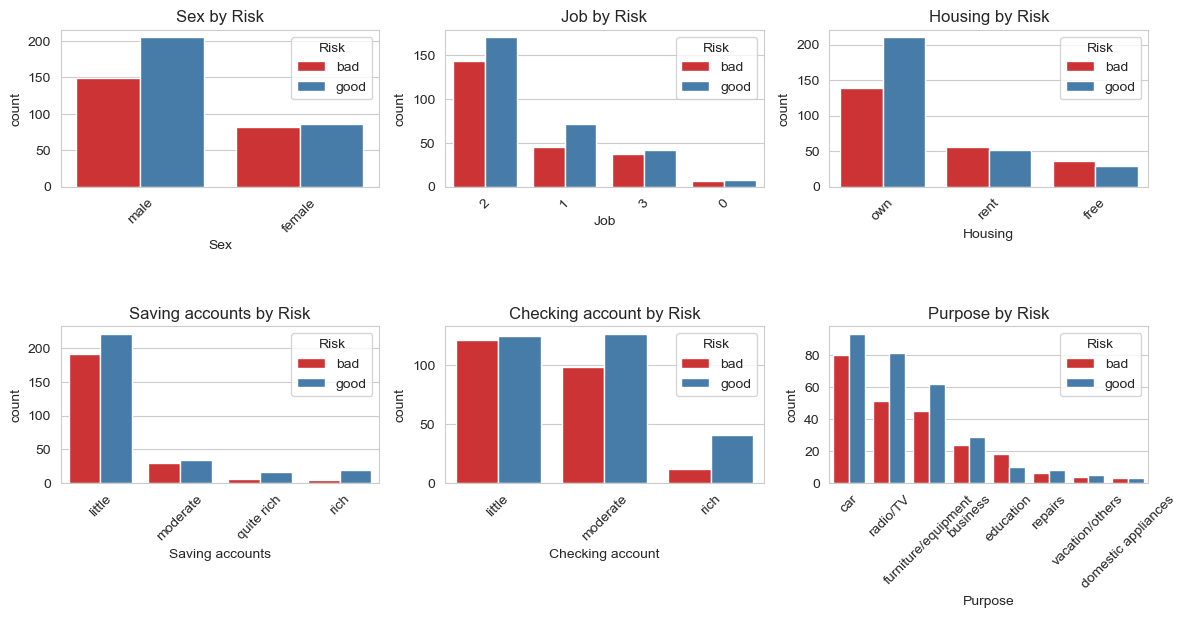

In [30]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue='Risk', palette='Set1', order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{col} by Risk')
plt.tight_layout()
plt.show()

In [31]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [32]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']

In [33]:
target = 'Risk'

In [34]:
df_model = df[features + [target]].copy()

In [35]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [36]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [37]:
cat_cols = df_model.select_dtypes(include=['object']).columns.drop('Risk')

In [38]:
le_dict = {}

In [39]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [40]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f'le_{col}_encoder.pkl')

In [41]:
le_target = LabelEncoder()

In [42]:
df_model[target] = le_target.fit_transform(df_model[target])

In [43]:
df_model[target].value_counts()

1    291
0    231
Name: Risk, dtype: int64

In [44]:
joblib.dump(le_target, 'target_encoder.pkl')

['target_encoder.pkl']

In [45]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_model.drop(columns=target, axis=1)
y = df_model[target]

In [48]:
target

'Risk'

In [49]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int32

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [51]:
X_train.shape

(417, 8)

In [52]:
X_test.shape

(105, 8)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [55]:
dt = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [56]:
import os
os.makedirs(r"C:\joblib_temp", exist_ok=True)
os.environ["JOBLIB_TEMP_FOLDER"] = r"C:\joblib_temp"
os.environ["TEMP"] = r"C:\joblib_temp"    # optional
os.environ["TMP"]  = r"C:\joblib_temp"    # optional


In [57]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [58]:
print('Decision Tree Accuracy:', acc_dt)

Decision Tree Accuracy: 0.580952380952381


In [59]:
print('Best Params:', params_dt)

Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [60]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)

In [61]:
rf_param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}


In [62]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [63]:
print('Random Forest Accuracy:', acc_rf)

Random Forest Accuracy: 0.6190476190476191


In [64]:
print('Best params:', params_rf)

Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [65]:
et = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1)

In [66]:
et_param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [68]:
print('Extra Trees Accuracy:', acc_et)

Extra Trees Accuracy: 0.6476190476190476


In [69]:
print('Best params:', params_et)

Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [70]:
xgb = XGBClassifier(random_state=1, scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder=False, eval_metric='logloss', n_jobs=-1)

In [71]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

In [72]:
import sklearn, xgboost
print('sklearn:', sklearn.__version__, 'xgboost:', xgboost.__version__)


sklearn: 1.6.1 xgboost: 2.1.4


In [73]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

d:\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:36:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [74]:
print('XGBoost Accuracy:', acc_xgb)

XGBoost Accuracy: 0.6761904761904762


In [75]:
print('Best params:', params_xgb)

Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [76]:
best_et.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [77]:
joblib.dump(best_et, 'best_extra_trees_model.pkl') 

['best_extra_trees_model.pkl']